In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import talib as ta
from trend_v1 import *
import copy as cp
import warnings
warnings.filterwarnings('ignore')

<h3>First here, I tried to detect the turning points like last time I showed you</h3>

In [2]:
def data_collection(filename):
    Folder_data = '../Data/'
    data = pd.read_csv(Folder_data +filename)
    data.reset_index(drop=True, inplace=True)
    data.info()
    return data

In [3]:
def plot_pivots(data,pivots):
    plt.figure(figsize = (15,10))
    plt.xlim(0, len(data))
    plt.ylim(data.min()*0.99, data.max()*1.01)
    plt.plot(np.arange(len(data)), data, 'k:', alpha=0.5)
    plt.plot(np.arange(len(data))[pivots != 0], data[pivots != 0], 'k-')
    plt.scatter(np.arange(len(data))[pivots == 1], data[pivots == 1], color='g')
    plt.scatter(np.arange(len(data))[pivots == -1], data[pivots == -1], color='r')

In [4]:
EU_Build = data_collection('EU_H1_Build.csv')
EU_Build.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62399 entries, 0 to 62398
Data columns (total 6 columns):
Local time    62399 non-null object
Open          62399 non-null float64
High          62399 non-null float64
Low           62399 non-null float64
Close         62399 non-null float64
Volume        62399 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.9+ MB


,Local time,Open,High,Low,Close,Volume
62394,13.07.2018 18:00:00.000 GMT+0200,1.16665,1.16776,1.16653,1.16733,10647.7695
62395,13.07.2018 19:00:00.000 GMT+0200,1.16733,1.16755,1.16660,1.16755,9190.4004
62396,13.07.2018 20:00:00.000 GMT+0200,1.16756,1.16828,1.16739,1.16767,7812.7700
62397,13.07.2018 21:00:00.000 GMT+0200,1.16768,1.16838,1.16757,1.16810,7784.0000
62398,13.07.2018 22:00:00.000 GMT+0200,1.16812,1.16868,1.16809,1.16843,4402.7002


In [5]:
EU_Build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62399 entries, 0 to 62398
Data columns (total 6 columns):
Local time    62399 non-null object
Open          62399 non-null float64
High          62399 non-null float64
Low           62399 non-null float64
Close         62399 non-null float64
Volume        62399 non-null float64
dtypes: float64(5), object(1)
memory usage: 2.9+ MB


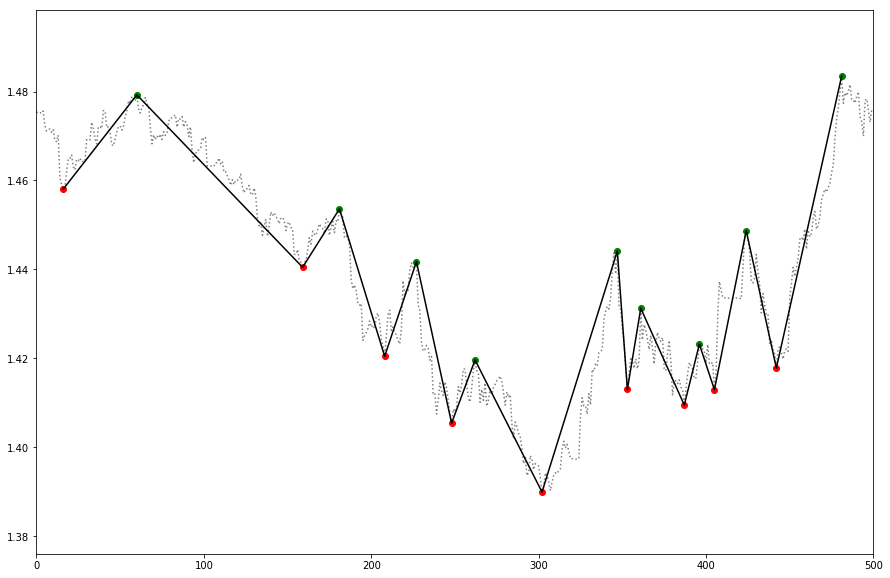

In [6]:
trend_build = trend_v1(EU_Build,0.006,-0.006) # 0.005 which means if there is a change of 50 pips, the trend is reversal.
first_pivot_build = trend_build.initial_pivot()
pivots_build = trend_build.peak_valley_pivots(first_pivot_build)
EU_Build['Pivots'] = pivots_build
plot_pivots(EU_Build['Close'][500:1000],EU_Build['Pivots'][500:1000])

In [7]:
trend_build.compute_segment_returns(pivots_build)

0        NaN
12       0.0
63       0.0
86       0.0
241      0.0
250      0.0
271      0.0
296      0.0
355      0.0
365      0.0
392      0.0
409      0.0
426      0.0
454      0.0
487      0.0
497      0.0
516      0.0
560      0.0
659      0.0
681      0.0
708      0.0
727      0.0
748      0.0
762      0.0
802      0.0
847      0.0
853      0.0
861      0.0
887      0.0
896      0.0
        ... 
60380    0.0
60406    0.0
60512    0.0
60705    0.0
60785    0.0
60807    0.0
60873    0.0
61256    0.0
61335    0.0
61449    0.0
61475    0.0
61558    0.0
61567    0.0
61612    0.0
61642    0.0
61647    0.0
61693    0.0
61718    0.0
61766    0.0
61788    0.0
61882    0.0
61898    0.0
61949    0.0
62002    0.0
62068    0.0
62120    0.0
62158    0.0
62178    0.0
62293    0.0
62398    NaN
Name: Close, Length: 1469, dtype: float64

<h3>Here I calculate some indicators: CCI and RSI</h3>

In [8]:
CCI_build = ta.CCI(EU_Build['High'], EU_Build['Low'], EU_Build['Close'], timeperiod=14)
RSI_build = ta.RSI(EU_Build['Close'], timeperiod=14)
EU_Build['CCI'] = CCI_build
EU_Build['RSI'] = RSI_build

In [9]:
df_build = EU_Build.where(EU_Build['Pivots']!=0)
df_build = df_build.dropna()
df_build = df_build.reset_index(drop=True)

d_H1_build = np.zeros(len(df_build['Close']))

for i in range(1,len(df_build['Close'])):
    d_H1_build[i] = df_build['Close'][i] - df_build['Close'][i-1]
    
#Distance is the amount of change between 2 Pivots points
df_build['Distance'] = d_H1_build
df_build.head(5)

,Local time,Open,High,Low,Close,Volume,Pivots,CCI,RSI,Distance
0,30.07.2008 15:00:00.000 GMT+0200,1.55492,1.55550,1.55183,1.55386,39627.9961,-1.0,-267.842682,30.108848,0.00000
1,31.07.2008 14:00:00.000 GMT+0200,1.56108,1.56842,1.55996,1.56761,40775.8945,1.0,182.893143,72.292200,0.01375
2,11.08.2008 01:00:00.000 GMT+0200,1.49516,1.49654,1.49189,1.49321,12670.9971,-1.0,-145.339757,14.451766,-0.07440
3,11.08.2008 10:00:00.000 GMT+0200,1.50320,1.50835,1.50250,1.50758,46006.3945,1.0,215.591993,54.477264,0.01437
4,12.08.2008 07:00:00.000 GMT+0200,1.48806,1.48908,1.48188,1.48292,28809.9004,-1.0,-206.553208,28.125896,-0.02466


<h3>Now I would like generate a new dataframe, whhich include the change between last pivots points and the strength in indicators CCI and RSI at that point. Based on the previous change, I will predict how much change will happen in the next move </h3>

In [10]:
Slide_data = df_build[["CCI","RSI","Distance"]]
Slide_data.head(5)

,CCI,RSI,Distance
0,-267.842682,30.108848,0.00000
1,182.893143,72.292200,0.01375
2,-145.339757,14.451766,-0.07440
3,215.591993,54.477264,0.01437
4,-206.553208,28.125896,-0.02466


<h3>Here I created a function window, which I consider window of 5 last elements in data to predict the next one</h3>

In [11]:
class WindowSlider(object):    
    def __init__(self, window_size):        
        self.w = window_size
        self.r = 1       
        self.l = 0
        self.p = 0
        self.names = []              
    def collect_windows(self, X):
        cols = len(list(X)) - 1
        N = len(X)
        self.l = N - self.w
        self.p = cols * self.w + 1
        x = cp.deepcopy(X)       
        for j, col in enumerate(list(x)):                        
            for i in range(self.w):               
                name = col + ('(%d)' % (i+1))
                self.names.append(name)          
        self.names.append('Y')

        df = pd.DataFrame(np.zeros(shape=(self.l,len(self.names))), columns=self.names)
        
        for i in range(self.l):
            slices = np.array([])
            for k in range(len(list(X))):
                line = X.values[i:self.w + i, k]
                slices = np.concatenate((slices, line))
            y = np.array(X.values[self.w + i + self.r - 1, -1]).reshape(1,)
            slices = np.concatenate((slices,y)) 
            df.iloc[i,:] = slices 
        return df

In [12]:
train_set = Slide_data[:1000].reset_index(drop=True)
test_set = Slide_data[1000:].reset_index(drop=True)

<h3>The table below is showed how the window works. They will consider all 5 last elements to predict the next change. Y is the distance would be in the next move </h3>

In [13]:
w = 3
train_win = WindowSlider(w)
train = train_win.collect_windows(train_set.iloc[:,0:])

test_win = WindowSlider(w)
test = test_win.collect_windows(test_set.iloc[:,0:])

train.head(5)

,CCI(1),CCI(2),CCI(3),RSI(1),RSI(2),RSI(3),Distance(1),Distance(2),Distance(3),Y
0,-267.842682,182.893143,-145.339757,30.108848,72.292200,14.451766,0.00000,0.01375,-0.07440,0.01437
1,182.893143,-145.339757,215.591993,72.292200,14.451766,54.477264,0.01375,-0.07440,0.01437,-0.02466
2,-145.339757,215.591993,-206.553208,14.451766,54.477264,28.125896,-0.07440,0.01437,-0.02466,0.01145
3,215.591993,-206.553208,155.503452,54.477264,28.125896,55.929682,0.01437,-0.02466,0.01145,-0.02814
4,-206.553208,155.503452,-142.079980,28.125896,55.929682,27.553291,-0.02466,0.01145,-0.02814,0.00987


RMSE = 0.01


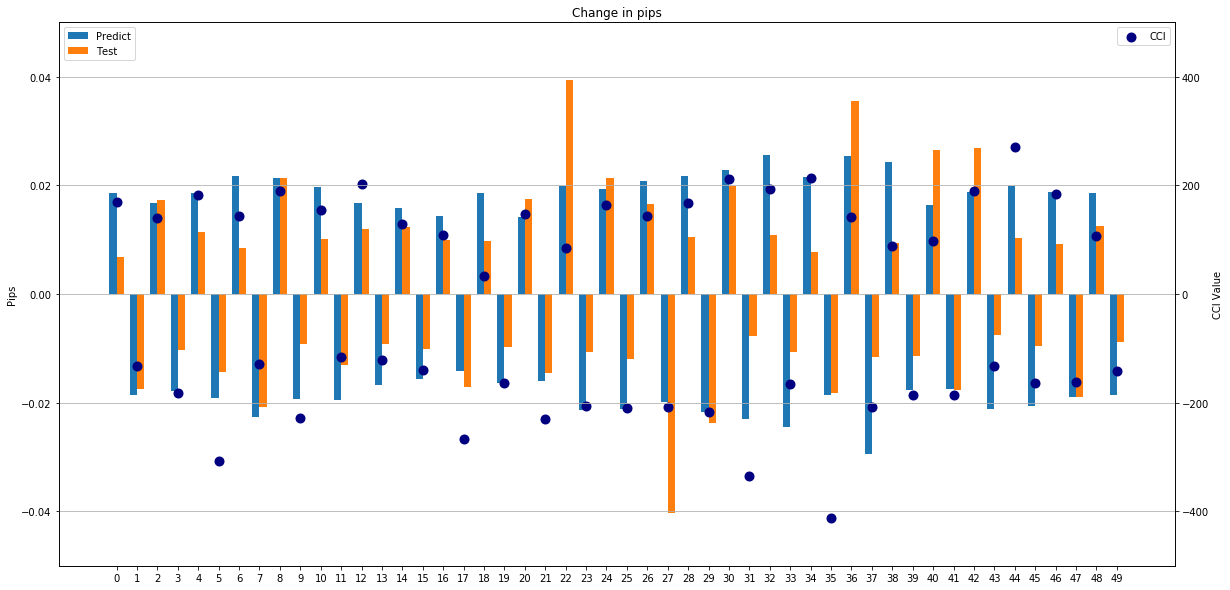

In [14]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train.iloc[:,:-1], train.iloc[:,-1])

lr_y = test['Y'].values
lr_y_fit = lr_model.predict(train.iloc[:,:-1])
lr_y_pred = lr_model.predict(test.iloc[:,:-1])

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

results = pd.DataFrame()
results['Test'] = lr_y.tolist()
results['Predict'] = lr_y_pred.tolist()
results['CCI']=0
for i in range(len(results['Test'])):
    results['CCI'][i] = test_set['CCI'][i+w]
x = np.arange(len(results['Predict'][200:250]))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (20,10))
lr_predict = ax.bar(x - width/2, results['Predict'][200:250], width, label='Predict')
lr_test_reg = ax.bar(x + width/2, results['Test'][200:250], width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pips')
ax.set_title('Change in pips')
ax.set_xticks(x)
ax.set_ylim(-0.05,0.05)
ax.legend(loc=2)
ax2 = ax.twinx()
ax2.set_ylabel('CCI Value')
ax2.scatter(ax.get_xticks(),results['CCI'][200:250],marker='o', c='navy', linewidth=4)
ax2.set_ylim(-500,500)
ax2.legend(loc=1)
ax2.grid()
plt.show()

<h3>Overview: </h3><br>
    1. As can we see from the chart, the predicted distance run by SVR fluctuate in range from -0.015-0.015, which is 150 Percentage in point(pips) in price. 
<br><br>
    2. Some extremely high move, which is more than 300 pips, the model cannot detect.
<br><br>
    3. There are still some points, the model can predict quite correctly.<br>
    
<h3>Analysis: </h3><br>
    1. By my experience, in 1-Hour timeframe, it is recommended that a wave could last for 100-150 pips. In this model, they also shown the fluctuation of the model also in 150 pips, and they cannot detect the extremly high or small move of the market.
    Thus, I feel this model is not really work as I expect.
<br> <br>   
    2. I tried to change the window size from 2 to 10 and higher, and the window = 5 is the most reasonable. 
    

<h4>
Therefore, instead of applying sliding window and SVR in the dataframe to predict the change of next move, I tried to apply directly into the original data, to predict the next Close price to see what happend.
    <br>
I created a new dataframe, which is just included the Close price and indicators values
</h4>

<h4>To me, i feel the results in this test is very similar to LSTM, They seem catch the same direction, but in fact there is a huge delay in result, which could lead to a bad trading!</h4>

<h3>
In a nutshell:
</h3>
<br>
1. In this approach way, when I used the turning point to dectect the trend, I set a threshold value is 0.005, which is 50 pips. It means, after a change in a direction of 50 pips, it confirms reversal trend. So the model actually cannot detect the turning point in real time. They would have a delay after 50 pips. In a big move of 150-300 pips, it is still acceptable, but in a short move of 70-100 pips, this delay would make the orders become less profitable. On the otherhand, in a short move, when the market reverses, the model also will get some delay time to detect it! The threshold value is also a recommended value in real trading, and when I tried to reduce the value, I got much noisy data.
<br>
<br>
2. In the first approach, we faced to a constant move of the model, and they cannot detect the extremly high or low. The constant returned is also widely recommended in trading world, thus it is quite excessive.
<br>
<br>
3. In the second approach, we faced to a delay in return price. At some point you can see, the market has already reversed, but the predicted price is still going to the peak.


<h4> Stragetry:</h4>

Below, I tried to do a stragety for the first approach, by using the **Sliding window**, **Turning points** and **SVR**. To reduce the effect of the delay, and to obtain the best signal. In my exp, even when we detect the peak points, I will go to check the value of indicators, and in this time, it is CCI.

The Strong reversed point is the point that has the CCI value high than 180 ( Sell point), or lower than -180 (Buy point). Other Peak points, which have the CCI values from 180 to -180 are just the consolidation in a big trend.

The code is not finished yet.

In [15]:
EU_Trade = data_collection('EU_H1_Trade.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12623 entries, 0 to 12622
Data columns (total 6 columns):
Local time    12623 non-null object
Open          12623 non-null float64
High          12623 non-null float64
Low           12623 non-null float64
Close         12623 non-null float64
Volume        12623 non-null float64
dtypes: float64(5), object(1)
memory usage: 591.8+ KB


In [29]:
EU_Trade[601:602]

,Local time,Open,High,Low,Close,Volume
601,17.08.2018 01:00:00.000 GMT+0200,1.13735,1.1376,1.13708,1.13718,2245.01


In [30]:
EU_Trade[3000:3001]

,Local time,Open,High,Low,Close,Volume
3000,04.01.2019 00:00:00.000 GMT+0100,1.1393,1.13964,1.13895,1.13899,10217.0898


In [16]:
report_info = ['Order Type','Profit and loss','Reason why exit']
df_report = pd.DataFrame(columns = report_info)
df_report.head(2)

,Order Type,Profit and loss,Reason why exit


In [17]:
Balance = 100000
trade_order = 0
size_order = 0
take_profit_point = 0
stop_loss_point = 0
enter_price = 0
last_pivot_price = 0
pnl = 0 #Profit and loss

In [18]:
trade_order = 1
pnl = 500
reason = "Reversed!"
df_report.append({'Order Type':trade_order,'Profit and loss':pnl,'Reason why exit':reason},ignore_index=True)

,Order Type,Profit and loss,Reason why exit
0,1,500,Reversed!


In [19]:
profit_loss = []

In [20]:
w = 3

<img src="mapping.PNG">

In [21]:
# I tried to run a simulation from 17.08.2018  to 04.01.2019, with 1H timeframe.
for i in range(601,3000):
    data_trade = EU_Trade[i-600:i]
    data_trade.reset_index(inplace=True,drop=True)
    trend_trade = trend_v1(data_trade,0.005,-0.005)
    first_pivot_trade = trend_trade.initial_pivot()
    pivots_trade = trend_trade.peak_valley_pivots(first_pivot_trade)
    data_trade['Pivots'] = pivots_trade
    CCI_trade = ta.CCI(data_trade['High'], data_trade['Low'], data_trade['Close'], timeperiod=14)
    RSI_trade = ta.RSI(data_trade['Close'], timeperiod=14)
    data_trade['CCI'] = CCI_trade
    data_trade['RSI'] = RSI_trade
    df_trade = data_trade.where(data_trade['Pivots']!=0)
    df_trade = df_trade.dropna()
    df_trade = df_trade.reset_index(drop=True)
    
    d_trade = np.zeros(len(df_trade['Close']))
    for i in range(1,len(df_trade['Close'])):
        d_trade[i] = df_trade['Close'][i] - df_trade['Close'][i-1]
    df_trade['Distance'] = d_trade
    
    #Check whether a new pivots points updated?
    if last_pivot_price != df_trade['Close'].iloc[-2]:
        #If yes, Close the current order, and update the it to the report
        if trade_order == -1:
            last_pivot_price = df_trade['Close'].iloc[-2]
            pnl = -(enter_price - EU_Trade['Close'][i] ) * size_order
            trade_order = 0
            print("Sell reversed!")
            print(pnl)
        if trade_order == 1:
            last_pivot_price = df_trade['Close'].iloc[-2]
            pnl = -(EU_Trade['Close'][i] - enter_price) * size_order
            trade_order = 0
            print("Buy reversed!")
            print(pnl)
        profit_loss.append(pnl)
        reason_exit = "Signal reversed!"
        df_report.append({'Order Type':trade_order,'Profit and loss':pnl,'Reason why exit':reason_exit},ignore_index=True)
    
        #Predict the next move
        df_next_move = df_trade[["CCI","RSI","Distance"]].tail(4)
        df_next_move.reset_index(inplace=True,drop = True)
        predict_win = WindowSlider(w)
        predict_sett = predict_win.collect_windows(df_next_move.iloc[:,0:])
        predict_distance = lr_model.predict(predict_sett.iloc[:,:-1])  
        predict_sett = predict_sett.iloc[0:0]
        #Enter Buy/Sell Order
        #Buy order:
        if df_trade['CCI'].iloc[-2] <= -180:
            trade_order = 1
            size_order = 0.7 * 100000 #0.7 lot
            enter_price = data_trade['Close'][i]
            stop_loss_point = df_trade['Close'].iloc[-2] - 0.002 
            loss_d = stop_loss_point - data_trade['Close'][i]
            profit_d = predict_distance[0]-0.005
            take_profit_point= data_trade['Close'][i] + profit_d
            
        elif 0 >= df_trade['CCI'].iloc[-2] > -180:
            trade_order = 1
            size_order = 1 * 100000 #1lot
            enter_price = data_trade['Close'][i]
            stop_loss_point = df_trade['Close'].iloc[-2] - 0.002 
            loss_d = stop_loss_point - data_trade['Close'][i]
            profit_d = predict_distance[0]-0.005
            take_profit_point= data_trade['Close'][i] + profit_d
        #Sell order:
        elif df_trade['CCI'].iloc[-2] >= 180:
            trade_order = -1
            size_order = 0.7 * 100000 #0.7 lot
            enter_price = data_trade['Close'][i]
            stop_loss_point = df_trade['Close'].iloc[-2] + 0.002 
            loss_d = stop_loss_point - data_trade['Close'][i]
            profit_d = predict_distance[0]+0.005
            take_profit_point= data_trade['Close'][i] + profit_d
        elif 180 > df_trade['CCI'].iloc[-2] > 0:
            trade_order = -1
            size_order = 1 * 100000 #1 lot
            enter_price = data_trade['Close'][i]
            stop_loss_point = df_trade['Close'].iloc[-2] + 0.002 
            loss_d = stop_loss_point - data_trade['Close'][i]
            profit_d = predict_distance[0]+0.005
            take_profit_point= data_trade['Close'][i] + profit_d
        df_report.append({'Order Type':trade_order,'Profit and loss':pnl,'Reason why exit':reason_exit},ignore_index=True)
    
    else:
        #if trade_order == 0:
        #   break
        if trade_order == 1:
            if data_trade['High'][i] >= take_profit_point:
                pnl = profit_d * size_order
                reason_exit = "Take profit"
                trade_order = 0
                profit_loss.append(pnl)
                print("Buy loss:")
                print(pnl)
            elif data_trade['Low'][i] <= stop_loss_point:
                pnl = loss_d * size_order
                reason_exit = "Stop loss"
                trade_order = 0
                profit_loss.append(pnl)
                print("Buy profit:")
                print(pnl)                
        elif trade_order == -1:
            if data_trade['Low'][i] <= take_profit_point:
                pnl = profit_d * size_order
                reason_exit = "Take profit"
                trade_order = 0
                profit_loss.append(pnl)
                print("Sell loss:")
                print(pnl)  
            elif data_trade['High'][i] >= stop_loss_point:
                pnl = loss_d * size_order
                reason_exit = "Stop loss"
                trade_order = 0
                profit_loss.append(pnl)
                print("Sell profit:")
                print(pnl)
        df_report.append({'Order Type':trade_order,'Profit and loss':pnl,'Reason why exit':reason_exit},ignore_index=True)
    profit_loss.append(pnl)


Buy reversed!
-0.0
Buy reversed!
-87.99999999997698
Sell profit:
168.70000000000164
Buy reversed!
991.0000000000085
Buy reversed!
1057.000000000019
Sell reversed!
-700.999999999996
Buy reversed!
594.0000000000057
Sell reversed!
659.0000000000095
Buy reversed!
-483.000000000009
Sell reversed!
171.4999999999889
Buy profit:
-549.9999999999839
Sell reversed!
1767.4999999999995
Sell reversed!
1878.0999999999938
Buy profit:
1997.0000000000043
Sell reversed!
1237.5999999999942
Sell reversed!
1100.399999999997
Buy profit:
1913.000000000009
Sell reversed!
669.0000000000085
Sell reversed!
319.999999999987
Buy reversed!
518.7000000000097
Sell profit:
-927.0000000000111
Buy reversed!
-284.00000000001756
Buy reversed!
-461.0000000000003
Sell profit:
-404.59999999999275
Buy reversed!
-489.3000000000036
Buy reversed!
-223.30000000000183
Sell reversed!
1008.9999999999932
Buy reversed!
-196.0000000000095
Sell profit:
-97.00000000001374
Buy reversed!
86.10000000000451
Buy reversed!
76.99999999999152
Sel

In [22]:
final_profit_loss = list(set(profit_loss))

In [23]:
final_profit_loss

[-0.0,
 -1407.700000000005,
 518.7000000000097,
 266.0000000000107,
 -2293.999999999996,
 -1266.999999999996,
 785.4000000000005,
 2833.999999999981,
 659.0000000000095,
 2451.9999999999877,
 1941.1000000000179,
 -489.3000000000036,
 -2153.999999999989,
 669.0000000000085,
 -483.000000000009,
 -97.00000000001374,
 1057.000000000019,
 -223.30000000000183,
 168.70000000000164,
 -87.99999999997698,
 171.4999999999889,
 1963.500000000009,
 301.0000000000179,
 -338.8000000000124,
 2991.9999999999945,
 -461.0000000000003,
 -2381.999999999973,
 1843.100000000013,
 -455.00000000001205,
 -838.6000000000226,
 -196.0000000000095,
 -835.9999999999923,
 319.999999999987,
 -3264.0000000000005,
 -2113.9999999999936,
 -700.999999999996,
 -828.1000000000005,
 1989.4000000000078,
 -53.999999999998494,
 1100.399999999997,
 1997.0000000000043,
 76.99999999999152,
 -1330.699999999998,
 -821.9999999999894,
 594.0000000000057,
 1237.5999999999942,
 1878.0999999999938,
 86.10000000000451,
 86.99999999997044,


In [24]:
sum(final_profit_loss)


10600.499999999998

<h2>I got profit of 10600u with the capital 100000u in 5 months!</h2>